In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_price=pd.read_csv("D:\ML\data.csv")
df_price.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [27]:
# Describe data
df_price.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [28]:
df_price.drop(df_price.columns[df_price.columns.str.contains(
    'Unnamed', case=False)], axis=1, inplace=True)
df_price.head(50)

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
5,Acer,Extensa EX214-53 Laptop,39990,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
6,Dell,Inspiron 3520 D560896WIN9B Laptop,36790,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
7,Acer,Nitro V ANV15-51 2023 Gaming Laptop,76990,63.000000,13th Gen Intel Core i5 13420H,"Octa Core (4P + 4E), 12 Threads",16GB,DDR5,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1
8,Asus,Vivobook 15 X1502ZA-EJ523WS Laptop,48990,64.000000,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe,15.6,1920.0,1080.0,Windows 11 OS,1
9,Samsung,Galaxy Book2 Pro 13 Laptop,74990,68.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Iris Xe Graphics,13.3,1080.0,1920.0,Windows 11 OS,1


In [29]:
X = df_price[ 'spec_rating' ]
y = df_price[ 'price' ]
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 0 )
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(625,)
(268,)
(625,)
(268,)


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are Pandas Series objects
X_train_array = X_train.to_numpy().reshape(-1, 1)
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Now you can create your LinearRegression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train_array, y_train_array)

LinearRegression()

In [31]:
# Assuming X_test is a Pandas Series object
X_test_array = X_test.to_numpy().reshape(-1, 1)

# Make predictions
y_pred_test = regressor.predict(X_test_array)
# Assuming X_train is a Pandas Series object
X_train_array = X_train.to_numpy().reshape(-1, 1)

# Make predictions
y_pred_train = regressor.predict(X_train_array)


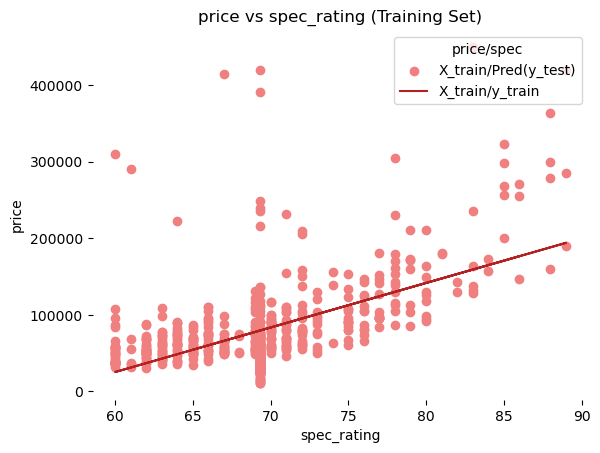

In [32]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('price vs spec_rating (Training Set)')
plt.xlabel('spec_rating')
plt.ylabel('price')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'price/spec', loc='best', facecolor='white')
plt.box(False)
plt.show()

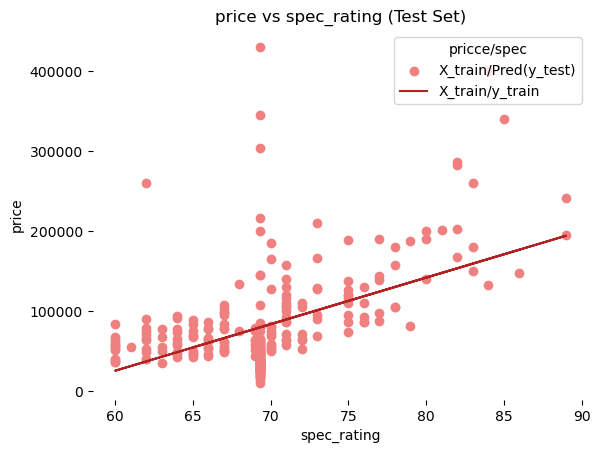

In [33]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('price vs spec_rating (Test Set)')
plt.xlabel('spec_rating')
plt.ylabel('price')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'pricce/spec', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [40]:
# Regressor coefficients
print(f'Coefficient: {regressor.coef_}')

Coefficient: [[16017.32665755]]


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_pred_test and y_test are the predicted and true values respectively
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R-squared:", r2_score(y_test, y_pred_test))

Mean Squared Error: 3952095744.817712
R-squared: 0.04031294754882386
